<a href="https://colab.research.google.com/github/vaibhav-adetwar/hello-world/blob/master/ML_Assignment2_2025ab05205ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score
from sklearn.metrics import recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
from google.colab import files
uploaded = files.upload()


df = pd.read_csv("creditcard.csv")

print(df.shape)
print(df['Class'].value_counts())



Saving creditcard.csv to creditcard.csv
(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


In [3]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df['Class'].value_counts())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [4]:
# Separate classes
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Random sample of non-fraud
non_fraud_sample = non_fraud.sample(n=len(fraud), random_state=42)

# Combine
balanced_df = pd.concat([fraud, non_fraud_sample])

# Shuffle dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

print(balanced_df['Class'].value_counts())
print(balanced_df.shape)


Class
0    492
1    492
Name: count, dtype: int64
(984, 31)


In [5]:
X = balanced_df.drop("Class", axis=1)
y = balanced_df["Class"]


In [6]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:,1]

log_accuracy = accuracy_score(y_test, log_pred)
log_auc = roc_auc_score(y_test, log_prob)
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)
log_mcc = matthews_corrcoef(y_test, log_pred)


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:,1]

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_prob)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_mcc = matthews_corrcoef(y_test, dt_pred)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_prob = knn_model.predict_proba(X_test)[:,1]

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_auc = roc_auc_score(y_test, knn_prob)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_mcc = matthews_corrcoef(y_test, knn_pred)


In [11]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)
nb_prob = nb_model.predict_proba(X_test)[:,1]

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_prob)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_mcc = matthews_corrcoef(y_test, nb_pred)


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:,1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_prob)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_mcc = matthews_corrcoef(y_test, rf_pred)


In [13]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:,1]

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_auc = roc_auc_score(y_test, xgb_prob)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_mcc = matthews_corrcoef(y_test, xgb_pred)


In [14]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Naive Bayes",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        log_accuracy,
        dt_accuracy,
        knn_accuracy,
        nb_accuracy,
        rf_accuracy,
        xgb_accuracy
    ],
    "AUC": [
        log_auc,
        dt_auc,
        knn_auc,
        nb_auc,
        rf_auc,
        xgb_auc
    ],
    "Precision": [
        log_precision,
        dt_precision,
        knn_precision,
        nb_precision,
        rf_precision,
        xgb_precision
    ],
    "Recall": [
        log_recall,
        dt_recall,
        knn_recall,
        nb_recall,
        rf_recall,
        xgb_recall
    ],
    "F1": [
        log_f1,
        dt_f1,
        knn_f1,
        nb_f1,
        rf_f1,
        xgb_f1
    ],
    "MCC": [
        log_mcc,
        dt_mcc,
        knn_mcc,
        nb_mcc,
        rf_mcc,
        xgb_mcc
    ]
})

results


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.934010,0.984024,0.947368,0.918367,0.932642,0.868400
1,Decision Tree,0.918782,0.918831,0.910000,0.928571,0.919192,0.837749
2,KNN,0.898477,0.951659,0.943182,0.846939,0.892473,0.800987
3,Naive Bayes,0.908629,0.948773,0.954545,0.857143,0.903226,0.821409
4,Random Forest,0.949239,0.979283,0.978261,0.918367,0.947368,0.900116
5,XGBoost,0.944162,0.981241,0.967742,0.918367,0.942408,0.889441


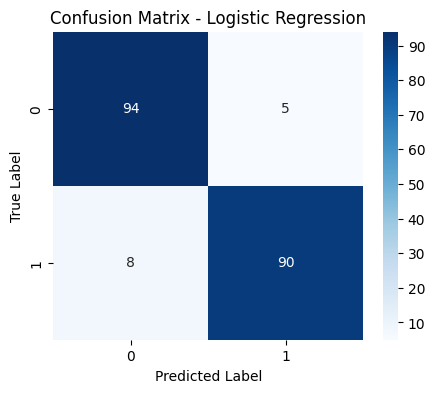

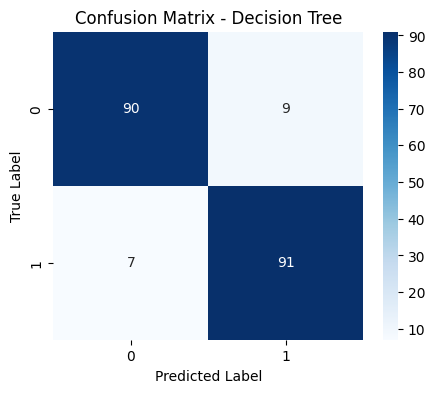

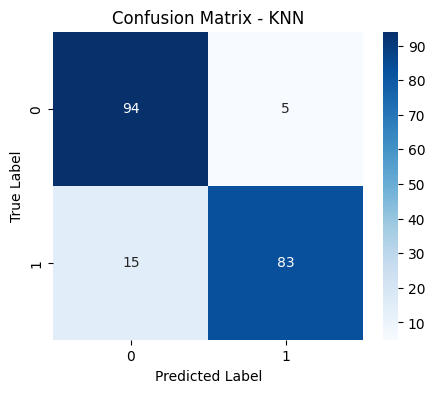

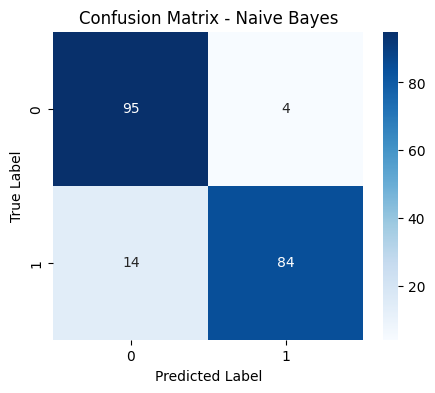

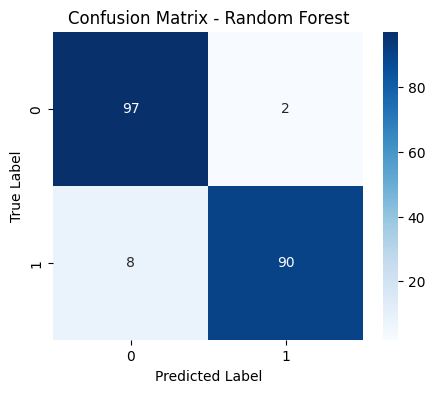

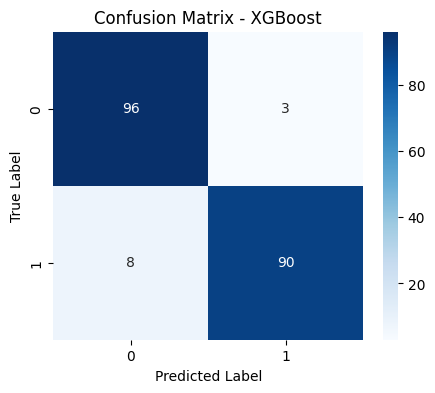

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(y_test, log_pred, "Logistic Regression")
plot_confusion_matrix(y_test, dt_pred, "Decision Tree")
plot_confusion_matrix(y_test, knn_pred, "KNN")
plot_confusion_matrix(y_test, nb_pred, "Naive Bayes")
plot_confusion_matrix(y_test, rf_pred, "Random Forest")
plot_confusion_matrix(y_test, xgb_pred, "XGBoost")

